## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   3.247532   998.233781  0.110030  4.996647  1.521665
1  33.281197  1488.411156  0.720225  4.410627  1.555383
2   9.312364   513.061803  0.104776  2.563171  1.318556
3  16.439625  1570.421771  0.948882  4.113420  1.644381
4  72.016590  1187.458697  0.343707  7.940222  1.447529


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0663898	total: 68.6ms	remaining: 1m 8s
1:	learn: 1.0550176	total: 69.3ms	remaining: 34.6s
2:	learn: 1.0436071	total: 69.8ms	remaining: 23.2s
3:	learn: 1.0311555	total: 70.3ms	remaining: 17.5s
4:	learn: 1.0228152	total: 71ms	remaining: 14.1s
5:	learn: 1.0098406	total: 71.5ms	remaining: 11.9s
6:	learn: 0.9973687	total: 71.9ms	remaining: 10.2s
7:	learn: 0.9843388	total: 72.4ms	remaining: 8.98s
8:	learn: 0.9761513	total: 72.8ms	remaining: 8.02s
9:	learn: 0.9665200	total: 73.4ms	remaining: 7.27s
10:	learn: 0.9558379	total: 73.9ms	remaining: 6.65s
11:	learn: 0.9452063	total: 74.4ms	remaining: 6.13s
12:	learn: 0.9342324	total: 74.9ms	remaining: 5.69s
13:	learn: 0.9247047	total: 75.4ms	remaining: 5.31s
14:	learn: 0.9141776	total: 75.9ms	remaining: 4.98s
15:	learn: 0.9043101	total: 76.3ms	remaining: 4.69s
16:	learn: 0.8949406	total: 76.9ms	remaining: 4.45s
17:	learn: 0.8857958	total: 77.4ms	remaining: 4.22s
18:	learn: 0.8746399	total: 77.8ms	remaining: 

89:	learn: 0.4510301	total: 109ms	remaining: 1.1s
90:	learn: 0.4471912	total: 109ms	remaining: 1.09s
91:	learn: 0.4441521	total: 110ms	remaining: 1.08s
92:	learn: 0.4412409	total: 110ms	remaining: 1.07s
93:	learn: 0.4375899	total: 111ms	remaining: 1.07s
94:	learn: 0.4336100	total: 111ms	remaining: 1.06s
95:	learn: 0.4301960	total: 112ms	remaining: 1.05s
96:	learn: 0.4265319	total: 112ms	remaining: 1.04s
97:	learn: 0.4238999	total: 112ms	remaining: 1.03s
98:	learn: 0.4209134	total: 113ms	remaining: 1.02s
99:	learn: 0.4177173	total: 113ms	remaining: 1.02s
100:	learn: 0.4142475	total: 113ms	remaining: 1.01s
101:	learn: 0.4116388	total: 114ms	remaining: 1s
102:	learn: 0.4087157	total: 114ms	remaining: 994ms
103:	learn: 0.4057496	total: 115ms	remaining: 987ms
104:	learn: 0.4030478	total: 115ms	remaining: 978ms
105:	learn: 0.3995430	total: 115ms	remaining: 972ms
106:	learn: 0.3962323	total: 116ms	remaining: 965ms
107:	learn: 0.3931583	total: 116ms	remaining: 958ms
108:	learn: 0.3903506	total

270:	learn: 0.1591175	total: 187ms	remaining: 503ms
271:	learn: 0.1584525	total: 187ms	remaining: 502ms
272:	learn: 0.1578689	total: 188ms	remaining: 500ms
273:	learn: 0.1571367	total: 188ms	remaining: 499ms
274:	learn: 0.1563546	total: 189ms	remaining: 498ms
275:	learn: 0.1558658	total: 189ms	remaining: 496ms
276:	learn: 0.1551376	total: 190ms	remaining: 495ms
277:	learn: 0.1544025	total: 190ms	remaining: 493ms
278:	learn: 0.1536460	total: 190ms	remaining: 491ms
279:	learn: 0.1530309	total: 191ms	remaining: 492ms
280:	learn: 0.1524147	total: 192ms	remaining: 491ms
281:	learn: 0.1517763	total: 192ms	remaining: 490ms
282:	learn: 0.1510863	total: 193ms	remaining: 488ms
283:	learn: 0.1504278	total: 193ms	remaining: 487ms
284:	learn: 0.1499668	total: 193ms	remaining: 485ms
285:	learn: 0.1493702	total: 194ms	remaining: 484ms
286:	learn: 0.1486941	total: 194ms	remaining: 483ms
287:	learn: 0.1480694	total: 195ms	remaining: 481ms
288:	learn: 0.1474716	total: 195ms	remaining: 480ms
289:	learn: 

507:	learn: 0.0712987	total: 291ms	remaining: 282ms
508:	learn: 0.0711457	total: 291ms	remaining: 281ms
509:	learn: 0.0709945	total: 292ms	remaining: 280ms
510:	learn: 0.0707641	total: 292ms	remaining: 280ms
511:	learn: 0.0706881	total: 293ms	remaining: 279ms
512:	learn: 0.0706132	total: 293ms	remaining: 278ms
513:	learn: 0.0703078	total: 294ms	remaining: 278ms
514:	learn: 0.0701046	total: 294ms	remaining: 277ms
515:	learn: 0.0699041	total: 295ms	remaining: 276ms
516:	learn: 0.0697070	total: 295ms	remaining: 275ms
517:	learn: 0.0695101	total: 295ms	remaining: 275ms
518:	learn: 0.0693040	total: 296ms	remaining: 274ms
519:	learn: 0.0690074	total: 296ms	remaining: 273ms
520:	learn: 0.0688166	total: 297ms	remaining: 273ms
521:	learn: 0.0686229	total: 297ms	remaining: 272ms
522:	learn: 0.0684314	total: 297ms	remaining: 271ms
523:	learn: 0.0682115	total: 298ms	remaining: 271ms
524:	learn: 0.0680701	total: 299ms	remaining: 270ms
525:	learn: 0.0680034	total: 299ms	remaining: 269ms
526:	learn: 

680:	learn: 0.0487432	total: 369ms	remaining: 173ms
681:	learn: 0.0486816	total: 370ms	remaining: 172ms
682:	learn: 0.0486208	total: 370ms	remaining: 172ms
683:	learn: 0.0485607	total: 370ms	remaining: 171ms
684:	learn: 0.0483840	total: 371ms	remaining: 170ms
685:	learn: 0.0482993	total: 371ms	remaining: 170ms
686:	learn: 0.0480742	total: 371ms	remaining: 169ms
687:	learn: 0.0479028	total: 372ms	remaining: 169ms
688:	learn: 0.0478207	total: 372ms	remaining: 168ms
689:	learn: 0.0476528	total: 373ms	remaining: 167ms
690:	learn: 0.0475552	total: 373ms	remaining: 167ms
691:	learn: 0.0474072	total: 374ms	remaining: 166ms
692:	learn: 0.0473237	total: 374ms	remaining: 166ms
693:	learn: 0.0471062	total: 375ms	remaining: 165ms
694:	learn: 0.0470128	total: 375ms	remaining: 165ms
695:	learn: 0.0469503	total: 375ms	remaining: 164ms
696:	learn: 0.0468335	total: 376ms	remaining: 163ms
697:	learn: 0.0467750	total: 376ms	remaining: 163ms
698:	learn: 0.0465635	total: 376ms	remaining: 162ms
699:	learn: 

921:	learn: 0.0280178	total: 473ms	remaining: 40ms
922:	learn: 0.0279831	total: 474ms	remaining: 39.5ms
923:	learn: 0.0279490	total: 474ms	remaining: 39ms
924:	learn: 0.0278683	total: 474ms	remaining: 38.5ms
925:	learn: 0.0278349	total: 475ms	remaining: 37.9ms
926:	learn: 0.0277477	total: 475ms	remaining: 37.4ms
927:	learn: 0.0276973	total: 476ms	remaining: 36.9ms
928:	learn: 0.0276173	total: 476ms	remaining: 36.4ms
929:	learn: 0.0275383	total: 477ms	remaining: 35.9ms
930:	learn: 0.0275019	total: 477ms	remaining: 35.3ms
931:	learn: 0.0274521	total: 477ms	remaining: 34.8ms
932:	learn: 0.0273776	total: 478ms	remaining: 34.3ms
933:	learn: 0.0273449	total: 478ms	remaining: 33.8ms
934:	learn: 0.0273129	total: 478ms	remaining: 33.3ms
935:	learn: 0.0272402	total: 479ms	remaining: 32.7ms
936:	learn: 0.0272054	total: 479ms	remaining: 32.2ms
937:	learn: 0.0271741	total: 480ms	remaining: 31.7ms
938:	learn: 0.0271434	total: 480ms	remaining: 31.2ms
939:	learn: 0.0270703	total: 481ms	remaining: 30.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

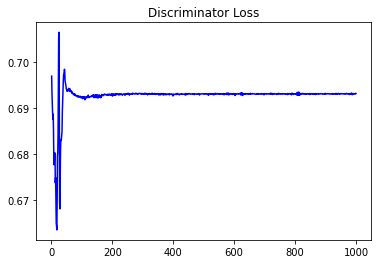

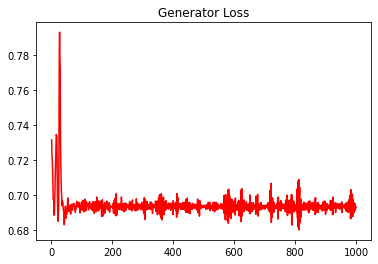

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08161578085049552


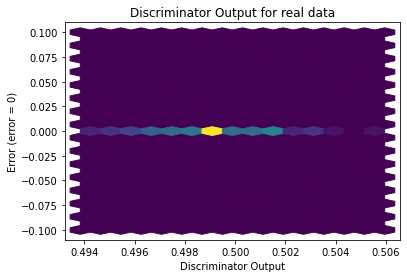

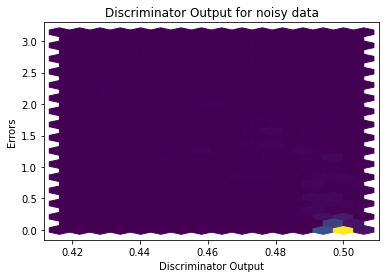

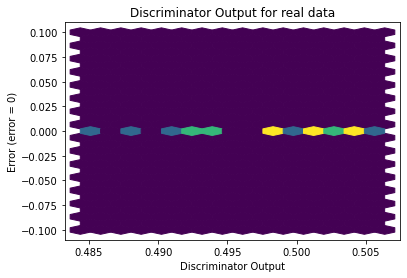

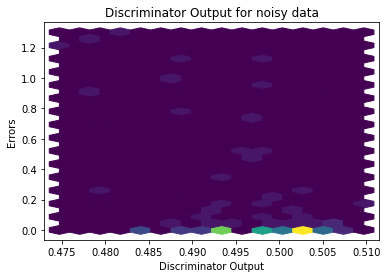

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


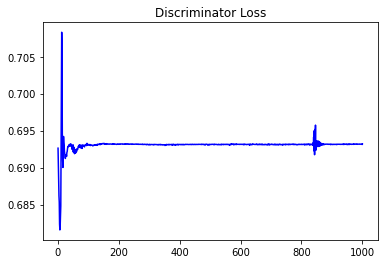

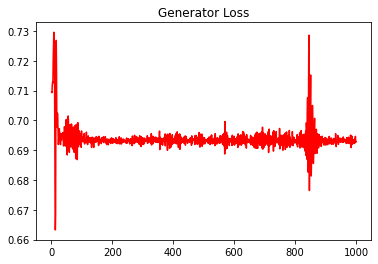

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09599261407616556


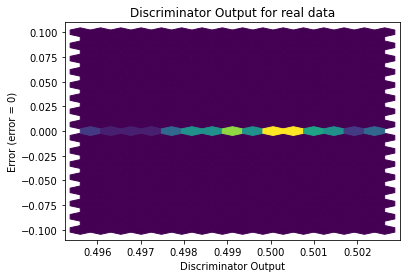

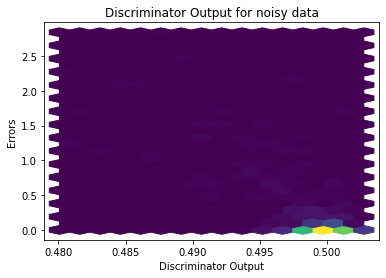

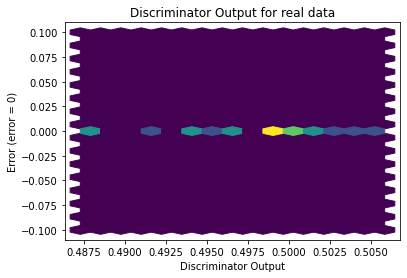

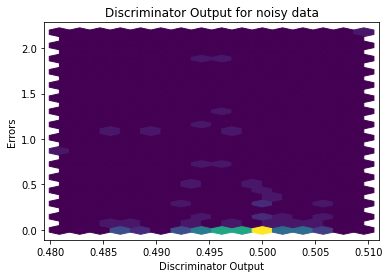

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5764]], requires_grad=True)
